In [7]:
import csv
from matplotlib import pyplot as plt
import pandas as pd
from typing import Counter
import seaborn as sns

In [8]:
def get_most_recurring_winning_numbers(top_n):
    '''
    Returns the top n most recurring numbers.
    

    Return:
    - Dictionary of the top n most recurring numbers and their counts within the given section.
    '''
    winning_numbers = []
    with open('Lottery_Powerball_Winning_Numbers__Beginning_2010.csv', 'r') as csv_file:
        reader = csv.reader(csv_file)
        next(reader)  # Skip the header row

        for row in reader:
            # Split the 'Winning Numbers' column (index 1) into individual numbers
            numbers = row[1].split()  # Assuming numbers are separated by spaces
            winning_numbers.extend(numbers)  # Add numbers to the list

    # After the file is closed, process the data
    return dict(Counter(winning_numbers).most_common(top_n))



In [9]:
def visualize_top_recurring_winning_numbers(winning_numbers_dict):
    '''
    Visualizes top n most recurring numbers in a bar chart with improved visuals.
    '''
    # Set the figure size
    plt.figure(figsize=(10, 6))
    
    sorted_dict = dict(sorted(winning_numbers_dict.items(), key=lambda item: item[1], reverse=True))
    sns.barplot(x=list(sorted_dict.keys()), y=list(sorted_dict.values()), palette='viridis')
    
    plt.title('Top Recurring Winning Numbers', fontsize=16)
    plt.xlabel('Winning Numbers', fontsize=12)
    plt.ylabel('Frequency of Occurrence', fontsize=12)
    
    for index, value in enumerate(sorted_dict.values()):
        plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\shama\AppData\Local\Temp\ipykernel_22616\3435426155.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_dict.keys()), y=list(sorted_dict.values()), palette='viridis')


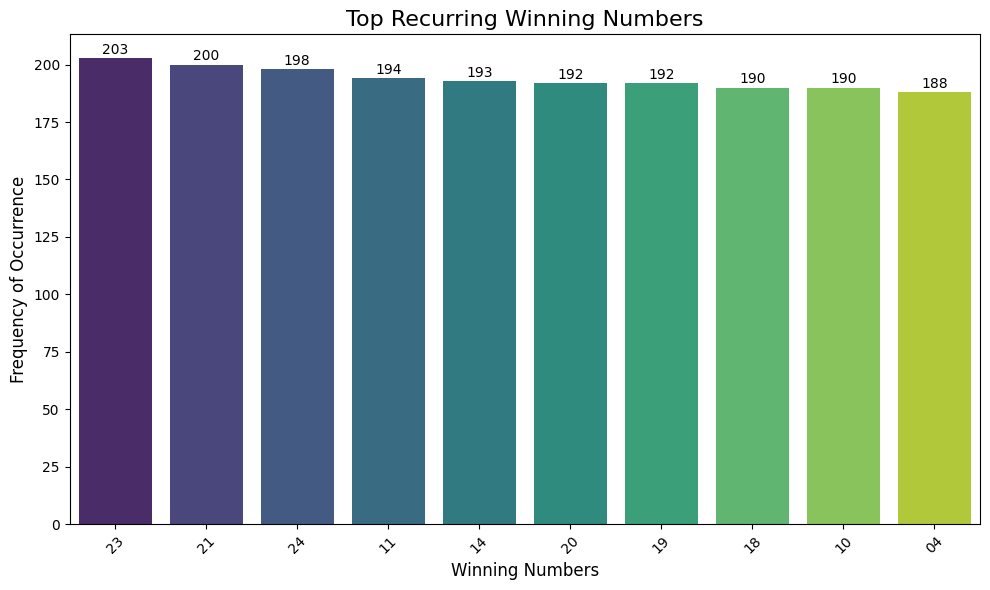

In [10]:
top_recurring_numbers = get_most_recurring_winning_numbers(10)
visualize_top_recurring_winning_numbers(top_recurring_numbers)

In [12]:
def visualize_top_recurring_numbers_by_section(section_data_dict):
    '''
    Visualizes top recurring winning numbers by section in a grouped bar chart.
    
    section_data_dict: A dictionary where each key is a section number, 
    and the value is another dictionary with top recurring numbers and their frequencies.
    '''

    data = []
    for section, top_numbers in section_data_dict.items():
        for number, count in top_numbers.items():
            data.append({'Section': f'Section {section}', 'Number': number, 'Frequency': count})
    
    df = pd.DataFrame(data)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Number', y='Frequency', hue='Section', data=df, palette='Set2')
    
    
    plt.title('Top Recurring Winning Numbers by Section', fontsize=16)
    plt.xlabel('Winning Numbers', fontsize=12)
    plt.ylabel('Frequency of Occurrence', fontsize=12)
    
    plt.tight_layout()
    plt.show()

In [13]:
def get_most_recurring_winning_number_by_section(section, top_n):
    ''' 
    Returns the top n most recurring numbers within the given section.
    Example winning number: 11 21 27 36 62 24
    Section 1 = 11
    Section 2 = 21
    Section 3 = 27
    Section 4 = 36
    Section 5 = 62
    Section 6 = 24

    Return:
    - Dictionary of the top n most recurring numbers and their counts within the given section.
    '''
    winning_number_by_section = {}

    with open('Lottery_Powerball_Winning_Numbers__Beginning_2010.csv', 'r') as csv_file:
        df = pd.read_csv(csv_file)
        winning_numbers = df['Winning Numbers'].values.tolist()

    for winning_number in winning_numbers:
        
        numbers = winning_number.split()
        
        if section > 0 and section <= len(numbers):
            # Converts to integer and accesses the correct section
            section_number = int(numbers[section - 1])
            winning_number_by_section[section_number] = winning_number_by_section.get(section_number, 0) + 1

    # Returns the top_n most common numbers
    return dict(Counter(winning_number_by_section).most_common(top_n))

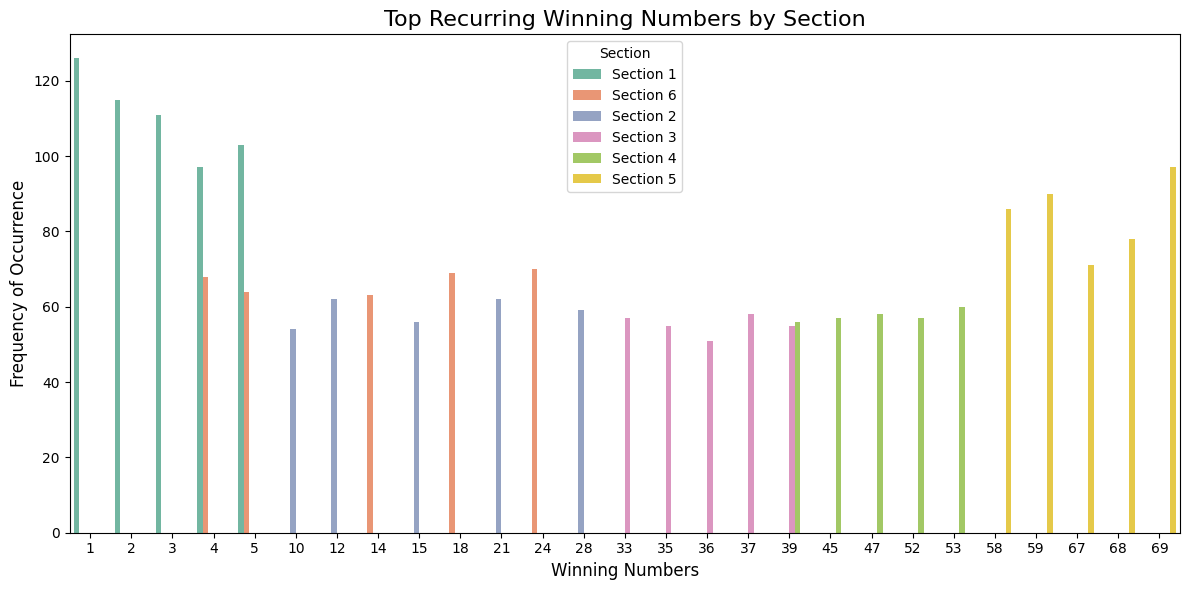

In [14]:
section_data = {}

for section in range(1, 7):
    top_recurring_numbers = get_most_recurring_winning_number_by_section(section, 5)
    section_data[section] = top_recurring_numbers

visualize_top_recurring_numbers_by_section(section_data)